In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
import re
import sys
from collections import Counter
from functools import reduce
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print
from tqdm import tqdm

In [2]:
def read_file_to_str_li(fp, print_exp=True):
    with open(fp, "r") as f:
        lines = f.read().split("\n")
    if print_exp:
        print(f"Read from {fp}:")
        print(f"First line: {lines[0]} | Last line: {lines[-1]}")
        print("-" * 6)

    return lines


# define the function blocks
def convert_to_int(input_str):
    if input_str == "" or input_str == " ":
        return None
    return int(input_str)


def convert_to_str(input_str):
    return str(input_str)


# map the inputs to the function blocks
converts = {
    "i": convert_to_int,
    "s": convert_to_str,
}


def convert_str_li_to_other_li(
    str_li, pattern="i", per_letter=False, sep=" ", start_row=0, end_row=None
):
    """Convert a list of string to a list of other types

    pattern: a list of types for one item.
        'i' for int, 's' for string
        'si' means: convert the 1st item to string, the rest to integer
        If separated items are more than pattern items,
        use the last one from the parttern.
    if per_letter=True, ignore sep and separate item per letter
    """
    target_str_li = str_li[start_row:end_row]
    # find max item num
    max_item_num = 1
    if per_letter:
        max_item_num = max([len(s) for s in target_str_li])
    else:
        max_item_num = max([len(s.split(sep)) for s in target_str_li])

    # extend the pattern to the max itme num
    pattern = (
        pattern + f"{pattern[-1]}" * (max_item_num - len(pattern))
        if max_item_num > len(pattern)
        else pattern
    )

    # convert
    if per_letter:
        return [
            [converts[pattern[idx]](item) for idx, item in enumerate(s)]
            for s in target_str_li
        ]
    else:
        if sep == " ":
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split())]
                for s in target_str_li
            ]
        else:
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split(sep))]
                for s in target_str_li
            ]

In [3]:
fp = "input.txt"
lines = read_file_to_str_li(fp)

print("Convert to:")

# head = convert_str_li_to_other_li(
#     lines, pattern="s", per_letter=True, sep=",", start_row=0, end_row=1
# )

# print(f"Head:\n{head}")
# print(f"First line: {head[0]}")
# print(f"Last line: {head[-1]}")

data = convert_str_li_to_other_li(
    lines, pattern="i", per_letter=True, sep="", start_row=None, end_row=None
)


print(f"First line: {data[0]}")
print(f"Last line: {data[-1]}")
print("-" * 6)

Read from input.txt:

First line: 404310113342042430523206553054613026452223317713352040314520532034136044035422242
052404520323121423 | Last line: 3214024054002524202164451321151244271512351026354463134220134
74177203430646340442422400002232222342

------

Convert to:

First line: [4, 0, 4, 3, 1, 0, 1, 1, 3, 3, 4, 2, 0, 4, 2, 4, 3, 0, 5, 2, 3, 2, 0, 6, 5, 5, 3,
0, 5, 4, 6, 1, 3, 0, 2, 6, 4, 5, 2, 2, 2, 3, 3, 1, 7, 7, 1, 3, 3, 5, 2, 0, 4, 0, 3, 1, 4, 5, 
2, 0, 5, 3, 2, 0, 3, 4, 1, 3, 6, 0, 4, 4, 0, 3, 5, 4, 2, 2, 2, 4, 2, 0, 5, 2, 4, 0, 4, 5, 2, 
0, 3, 2, 3, 1, 2, 1, 4, 2, 3]

Last line: [3, 2, 1, 4, 0, 2, 4, 0, 5, 4, 0, 0, 2, 5, 2, 4, 2, 0, 2, 1, 6, 4, 4, 5, 1, 3, 2, 
1, 1, 5, 1, 2, 4, 4, 2, 7, 1, 5, 1, 2, 3, 5, 1, 0, 2, 6, 3, 5, 4, 4, 6, 3, 1, 3, 4, 2, 2, 0, 
1, 3, 4, 7, 4, 1, 7, 7, 2, 0, 3, 4, 3, 0, 6, 4, 6, 3, 4, 0, 4, 4, 2, 4, 2, 2, 4, 0, 0, 0, 0, 
2, 2, 3, 2, 2, 2, 2, 3, 4, 2]

------

In [4]:
def plot_mtx(mtx):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(mtx, cmap=plt.cm.Blues)
    for i in range(mtx.shape[0]):
        for j in range(mtx.shape[1]):
            c = trees_mtx[i, j]
    plt.plot()

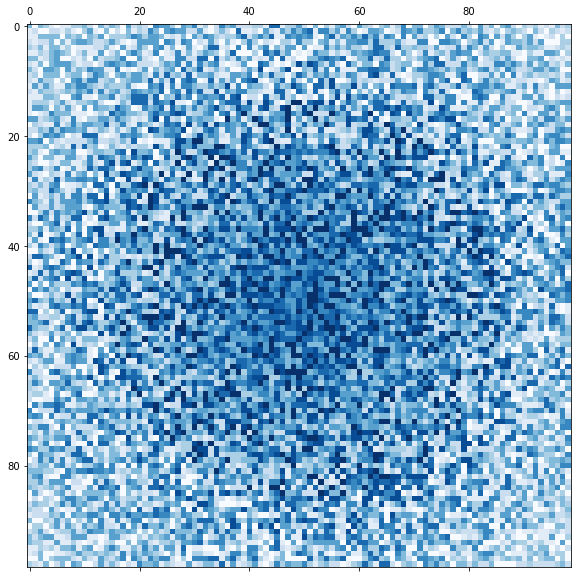

In [5]:
trees_mtx = np.matrix(data)
plot_mtx(trees_mtx)

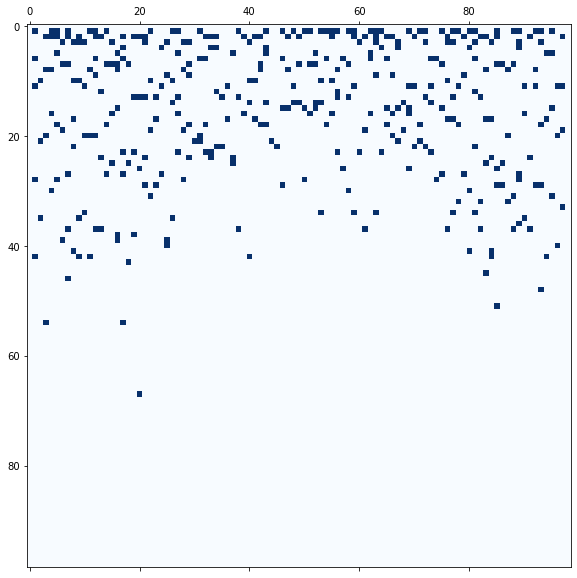

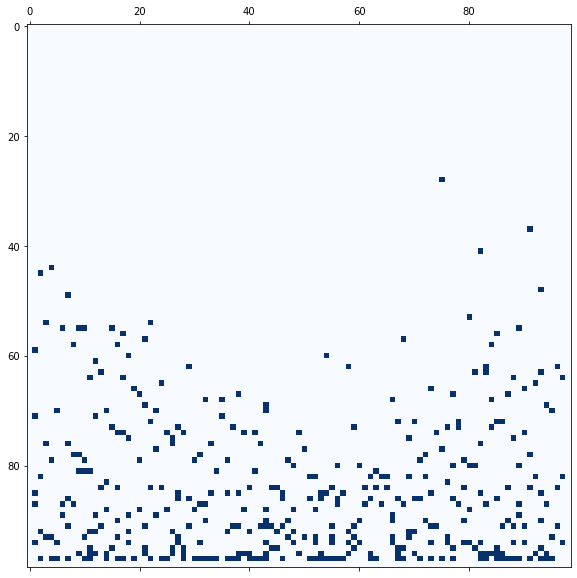

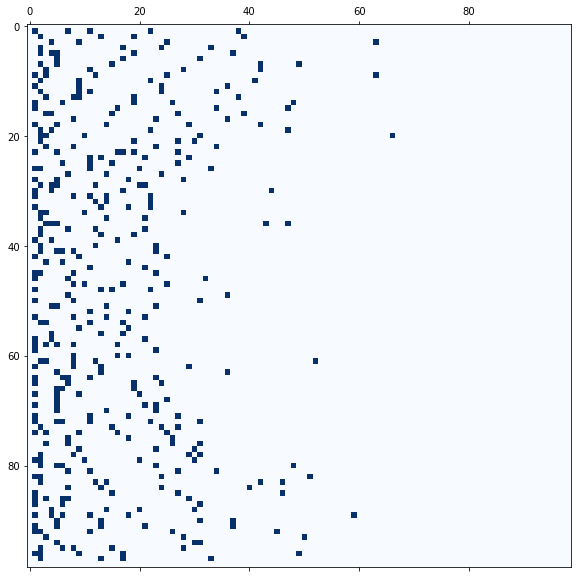

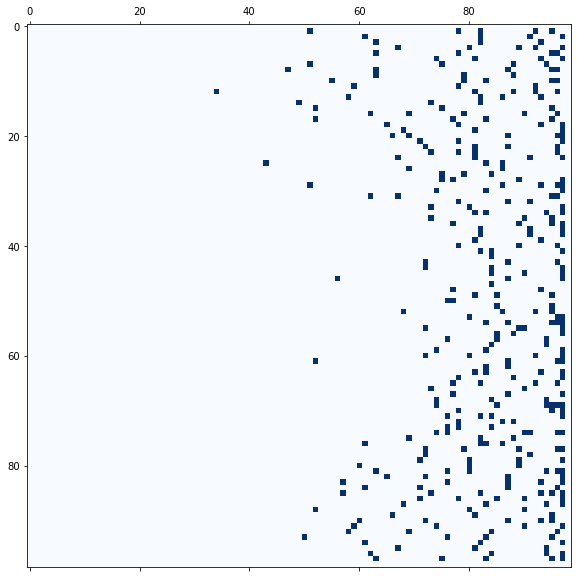

In [6]:
# Init mask
top_mask = trees_mtx == -1
bottom_mask = trees_mtx == -1
left_mask = trees_mtx == -1
right_mask = trees_mtx == -1

for j in range(1, trees_mtx.shape[1] - 1):
    # From top
    max_v = trees_mtx[0, j]
    for i in range(1, trees_mtx.shape[0] - 1):
        if trees_mtx[i, j] > max_v:
            top_mask[i, j] = True
            max_v = trees_mtx[i, j]
    # From bottom
    max_v = trees_mtx[trees_mtx.shape[0] - 1, j]
    for i in range(trees_mtx.shape[0] - 2, 0, -1):
        if trees_mtx[i, j] > max_v:
            bottom_mask[i, j] = True
            max_v = trees_mtx[i, j]

for i in range(1, trees_mtx.shape[0] - 1):
    # From left
    max_v = trees_mtx[i, 0]
    for j in range(1, trees_mtx.shape[1] - 1):
        if trees_mtx[i, j] > max_v:
            left_mask[i, j] = True
            max_v = trees_mtx[i, j]
    # From right
    max_v = trees_mtx[i, trees_mtx.shape[1] - 1]
    for j in range(trees_mtx.shape[1] - 2, 0, -1):
        if trees_mtx[i, j] > max_v:
            right_mask[i, j] = True
            max_v = trees_mtx[i, j]

plot_mtx(top_mask)
plot_mtx(bottom_mask)
plot_mtx(left_mask)
plot_mtx(right_mask)

Answer to Q1: 1538

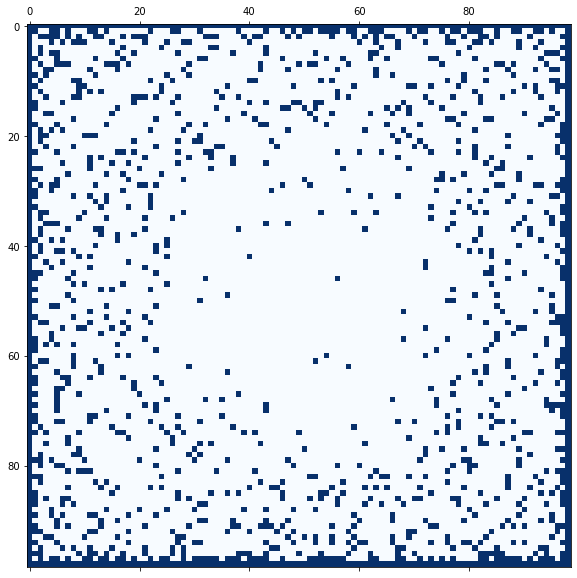

In [7]:
vis_mask = top_mask | bottom_mask | left_mask | right_mask

vis_mask[0, :] = True
vis_mask[:, -1] = True
vis_mask[-1, :] = True
vis_mask[:, 0] = True

plot_mtx(vis_mask)
print(f"Answer to Q1: {vis_mask.sum()}")

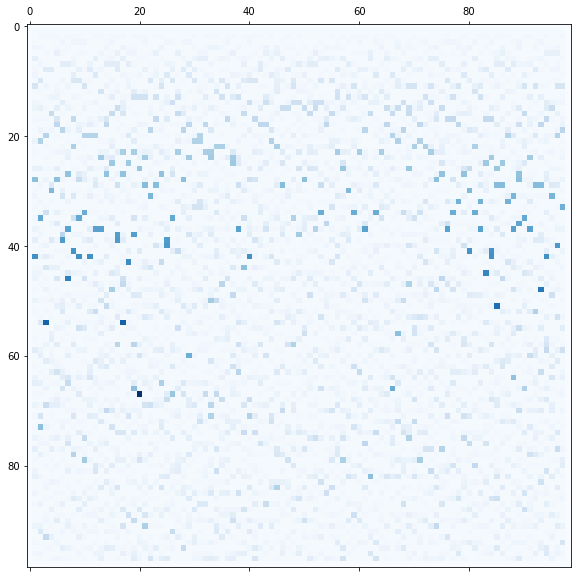

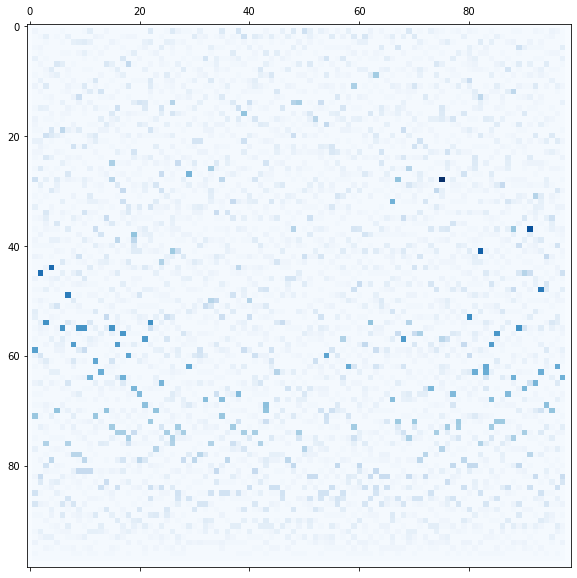

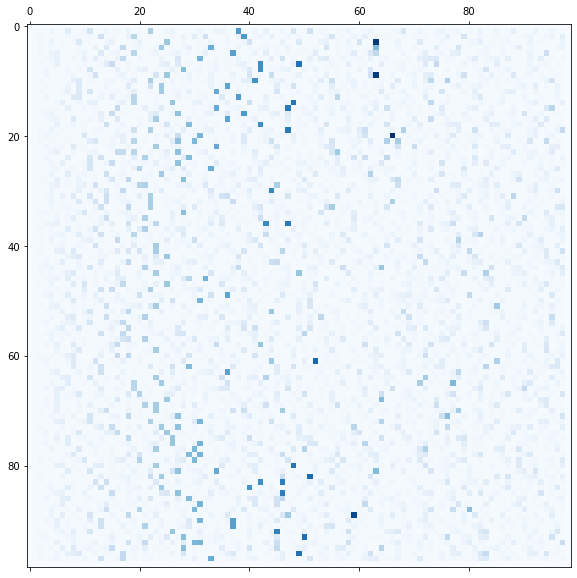

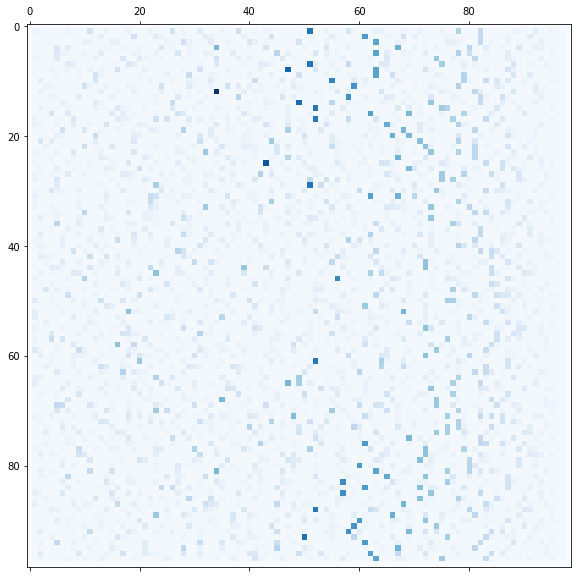

In [8]:
# Init count
top_count = np.zeros_like(trees_mtx)
bottom_count = np.zeros_like(trees_mtx)
left_count = np.zeros_like(trees_mtx)
right_count = np.zeros_like(trees_mtx)

for i in range(1, trees_mtx.shape[0] - 1):
    for j in range(1, trees_mtx.shape[1] - 1):
        # Look bottom
        for n_i in range(i + 1, trees_mtx.shape[0]):
            if trees_mtx[i, j] > trees_mtx[n_i, j]:
                bottom_count[i, j] += 1
            else:
                bottom_count[i, j] += 1
                break
        # Look top
        for n_i in range(i - 1, -1, -1):
            if trees_mtx[i, j] > trees_mtx[n_i, j]:
                top_count[i, j] += 1
            else:
                top_count[i, j] += 1
                break

        # Look right
        for n_j in range(j + 1, trees_mtx.shape[1]):
            if trees_mtx[i, j] > trees_mtx[i, n_j]:
                right_count[i, j] += 1
            else:
                right_count[i, j] += 1
                break
        # Look left
        for n_j in range(j - 1, -1, -1):
            if trees_mtx[i, j] > trees_mtx[i, n_j]:
                left_count[i, j] += 1
            else:
                left_count[i, j] += 1
                break


plot_mtx(top_count)
plot_mtx(bottom_count)
plot_mtx(left_count)
plot_mtx(right_count)

Answer to Q2: 496125

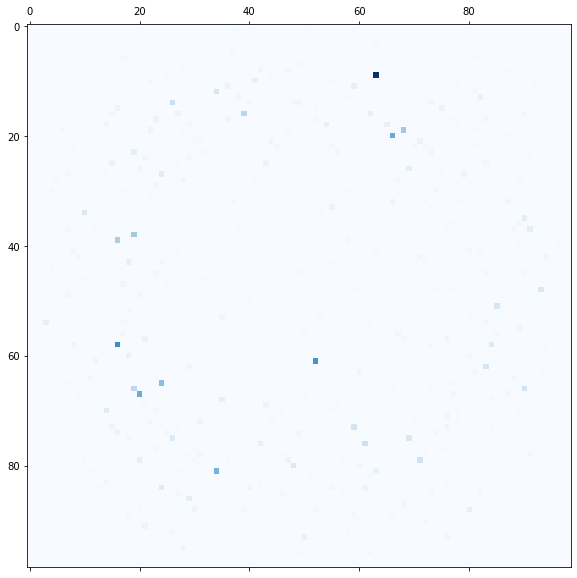

In [9]:
view_count = np.multiply(
    np.multiply(np.multiply(top_count, bottom_count), left_count), right_count
)
plot_mtx(view_count)
print(f"Answer to Q2: {view_count.max()}")